In [1]:
!pip install pandas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#to import the data Covid_Vaccine_Nigeria_2024.CSV
data = pd.read_csv('Covid_Vaccine_Nigeria-2024_2.csv')
data['Age'] = data['Age'].replace('35-34', '25-34')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36161 entries, 0 to 36160
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   v001                        36161 non-null  int64 
 1   v002                        36161 non-null  int64 
 2   v003                        36161 non-null  int64 
 3   v004                        36161 non-null  int64 
 4   v005                        36161 non-null  int64 
 5   v006                        36161 non-null  int64 
 6   v007                        36161 non-null  int64 
 7   wgt                         36161 non-null  int64 
 8   Covid_info                  36161 non-null  object
 9   Covid_fever                 36161 non-null  object
 10  Covid_cough                 36161 non-null  object
 11  Covid_SOB                   36161 non-null  object
 12  Covid_MSpain                36161 non-null  object
 13  Covid_headache              36161 non-null  ob

In [3]:
#look at the natre of the outcome(pridicted)
prevalence = data['Outcome_CovidVX'].value_counts()
print(prevalence)
prevalence_percent = data['Outcome_CovidVX'].value_counts(normalize=True) * 100
print(prevalence_percent)

Outcome_CovidVX
no     26698
yes     9463
Name: count, dtype: int64
Outcome_CovidVX
no     73.830923
yes    26.169077
Name: proportion, dtype: float64


In [4]:
#recode the outcome
data['Outcome_CovidVX'] = data['Outcome_CovidVX'].map({'yes': 1, 'no': 0})

In [5]:
y = data['Outcome_CovidVX']
X_raw= data[['Age', 'Education', 'Marital_status', 'Region','Occupation','Residence', 'Wealthindex','Distance_to_healthfacility','Money','Permission','Helath_insurance','Contraception','Visit_HealthFacility','Television','Radio','Newspaper']]             
X = pd.get_dummies(X_raw, drop_first=True).astype(int)

In [6]:
#run chisquare to identify more appropriate features (before dummying)
from scipy.stats import chi2_contingency
# Initialize list to store results
chi2_results = []
# Loop through each feature in X
for col in X_raw.columns:
    contingency_table = pd.crosstab(X_raw[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})
# Convert to DataFrame and sort by Chi2 statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2', ascending=False)
print(chi2_df)

                       Feature         Chi2        p-value
3                       Region  1395.067992  1.612427e-299
1                    Education   825.711427  1.147945e-178
4                   Occupation   663.717505  2.322050e-146
14                       Radio   527.292441  3.161558e-115
6                  Wealthindex   472.955336  4.727988e-101
0                          Age   453.152830   3.972951e-99
12        Visit_HealthFacility   331.601624   4.304810e-74
11               Contraception   318.719386   2.753268e-71
13                  Television   281.605851   7.080540e-62
10            Helath_insurance   252.670993   6.794403e-57
5                    Residence   200.691470   1.475499e-45
2               Marital_status   131.507688   2.776312e-29
9                   Permission   114.894719   8.298847e-27
15                   Newspaper   100.124295   1.812532e-22
8                        Money    84.607811   3.638250e-20
7   Distance_to_healthfacility    78.330895   8.714814e-

C:\Users\AUT\AppData\Local\Temp\ipykernel_22592\2247440107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')


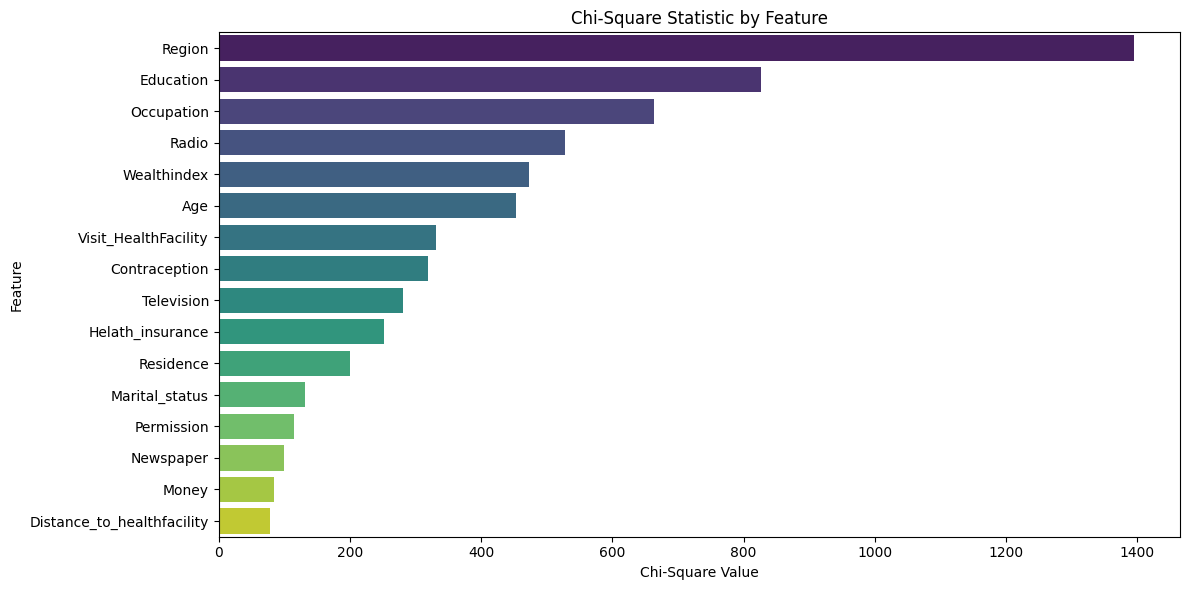

In [7]:
#Visualize Chi-Square Statistics with a Bar Plot (features before dummying)
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by Chi2 value (already done in chi2_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')
plt.title('Chi-Square Statistic by Feature')
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [8]:
#run chisquare to identify more appropriate features (after dummying)
from scipy.stats import chi2_contingency
# Initialize list to store results
chi2_results = []
# Loop through each feature in X
for col in X.columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})
# Convert to DataFrame and sort by Chi2 statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2', ascending=False)
print(chi2_df)

                                         Feature         Chi2        p-value
9                               Region_sout west  1068.844104  1.952223e-234
12                            Occupation_working   663.717505  2.322050e-146
2                         Education_no education   553.142607  2.608248e-122
27                              Radio_not at all   446.550748   4.062324e-99
26                    Radio_at least once a week   396.931242   2.564314e-88
8                              Region_north west   348.104882   1.096053e-77
15                           Wealthindex_poorest   336.116062   4.474426e-75
23                      Visit_HealthFacility_yes   331.601624   4.304810e-74
22                           Contraception_users   318.719386   2.753268e-71
1                                      Age_35-49   314.377282   2.430438e-70
25                         Television_not at all   280.041859   7.353166e-63
21                          Helath_insurance_yes   252.670993   6.794403e-57

C:\Users\AUT\AppData\Local\Temp\ipykernel_22592\3844465501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')


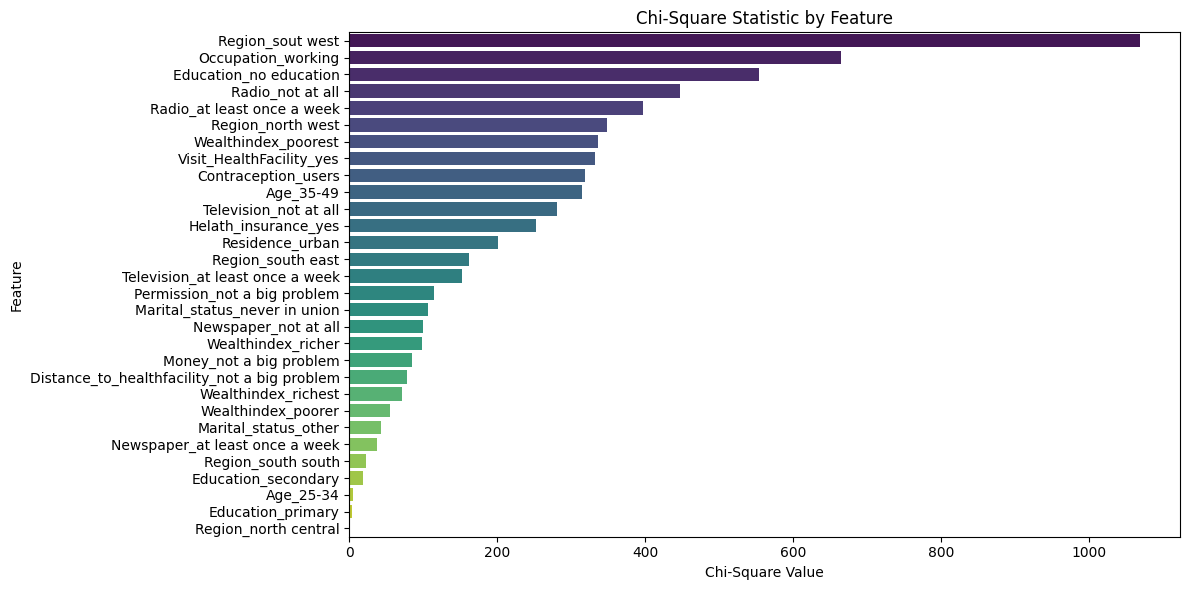

In [9]:
#Visualize Chi-Square Statistics with a Bar Plot (features after dummying)
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by Chi2 value (already done in chi2_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')
plt.title('Chi-Square Statistic by Feature')
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [10]:
##checking for multicolinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
# Drop missing values if any
X_clean = X.dropna()
# Add constant for intercept
X_const = sm.add_constant(X_clean)
# Calculate VIF
vif = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
}).sort_values(by="VIF", ascending=True)
print("VIF Scores:\n", vif)

VIF Scores:
                                          Feature        VIF
7                           Marital_status_other   1.063527
22                          Helath_insurance_yes   1.102337
24                      Visit_HealthFacility_yes   1.123883
23                           Contraception_users   1.142207
21                  Permission_not a big problem   1.173518
13                            Occupation_working   1.223712
20                       Money_not a big problem   1.302850
19  Distance_to_healthfacility_not a big problem   1.316233
29                Newspaper_at least once a week   1.552044
14                               Residence_urban   1.614104
30                          Newspaper_not at all   1.679173
15                            Wealthindex_poorer   1.715032
27                    Radio_at least once a week   1.736423
1                                      Age_25-34   1.864656
17                            Wealthindex_richer   1.914862
6                  Marital_

C:\Users\AUT\AppData\Local\Temp\ipykernel_22592\3844465501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')


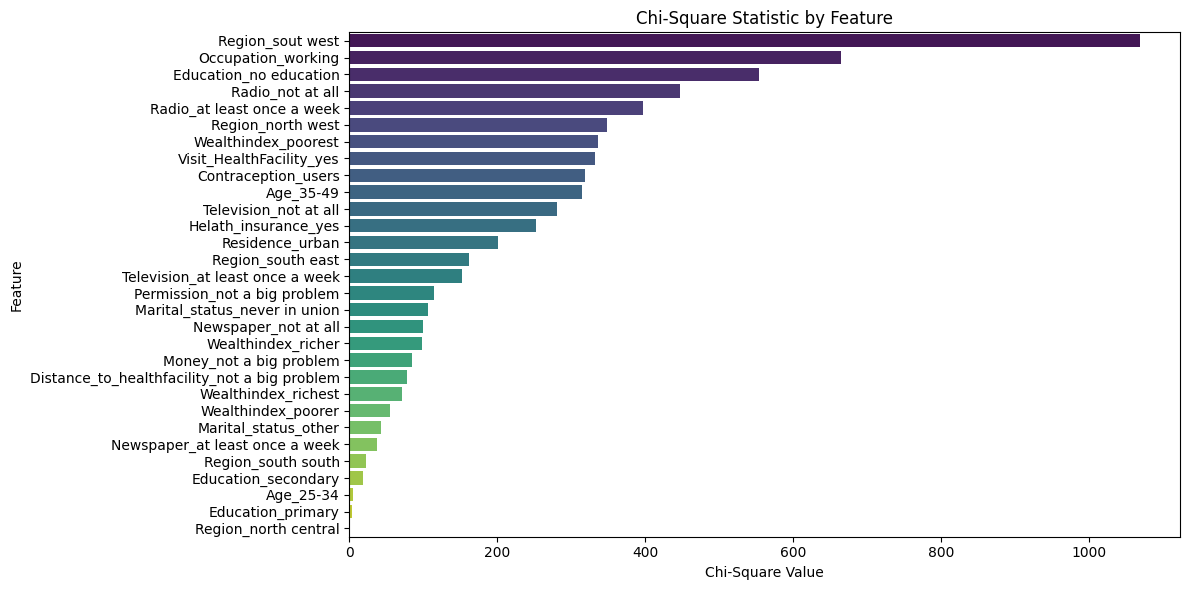

In [11]:
#Visualize Chi-Square Statistics with a Bar Plot (features after dummying)
import matplotlib.pyplot as plt
import seaborn as sns
# Sort by Chi2 value (already done in chi2_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='Chi2', y='Feature', palette='viridis')
plt.title('Chi-Square Statistic by Feature')
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [19]:
prevalence = data['Outcome_CovidVX'].value_counts()
print(prevalence)
prevalence_percent = data['Outcome_CovidVX'].value_counts(normalize=True) * 100
print(prevalence_percent)

Outcome_CovidVX
0    26698
1     9463
Name: count, dtype: int64
Outcome_CovidVX
0    73.830923
1    26.169077
Name: proportion, dtype: float64


In [12]:
#Check for Missing Values
print("Missing Values:\n", X.isnull().sum().sort_values(ascending=False))

Missing Values:
 Age_25-34                                       0
Age_35-49                                       0
Education_no education                          0
Education_primary                               0
Education_secondary                             0
Marital_status_never in union                   0
Marital_status_other                            0
Region_north central                            0
Region_north west                               0
Region_sout west                                0
Region_south east                               0
Region_south south                              0
Occupation_working                              0
Residence_urban                                 0
Wealthindex_poorer                              0
Wealthindex_poorest                             0
Wealthindex_richer                              0
Wealthindex_richest                             0
Distance_to_healthfacility_not a big problem    0
Money_not a big problem          

In [13]:
#To enhance model performance
#1 Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)


In [14]:
#3Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=10)
print("Average CV Accuracy:", scores.mean())

Average CV Accuracy: 0.727164182596441


In [15]:
###Train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Check sample sizes for testing and training data
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Total samples: 36161
Training samples: 28928
Testing samples: 7233


In [17]:
# Step 6: Fit logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
#make a prediction
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1] 

In [18]:
## Step 7: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
sensitivity = recall_score(y_test, y_pred_lr)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_lr)
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_lr[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(precision_score(y_true_boot, y_pred_boot))
    recalls.append(recall_score(y_true_boot, y_pred_boot))
    f1s.append(f1_score(y_true_boot, y_pred_boot))
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_lr))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.747 95% CI: [0.737 0.758]
🔹 Precision (PPV): 0.536 95% CI: [0.495 0.579]
🔹 Sensitivity (Recall): 0.147 95% CI: [0.132 0.165]
🔹 Specificity: 0.956 95% CI: [0.95  0.961]
🔹 Negative Predictive Value (NPV): 0.763 95% CI: [0.752 0.774]
🔹 False Positive Rate (FPR): 0.044 95% CI: [0.039 0.05 ]
🔹 False Negative Rate (FNR): 0.853 95% CI: [0.835 0.868]
🔹 F1 Score: 0.231 95% CI: [0.209 0.255]
🔹 Confusion Matrix:
 [[5126  238]
 [1594  275]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      5364
           1       0.54      0.15      0.23      1869

    accuracy                           0.75      7233
   macro avg       0.65      0.55      0.54      7233
weighted avg       0.70      0.75      0.69      7233

🔹 True Positives (TP): 275
🔹 True Negatives (TN): 5126
🔹 False Positives (FP): 238
🔹 False Negatives (FN): 1594


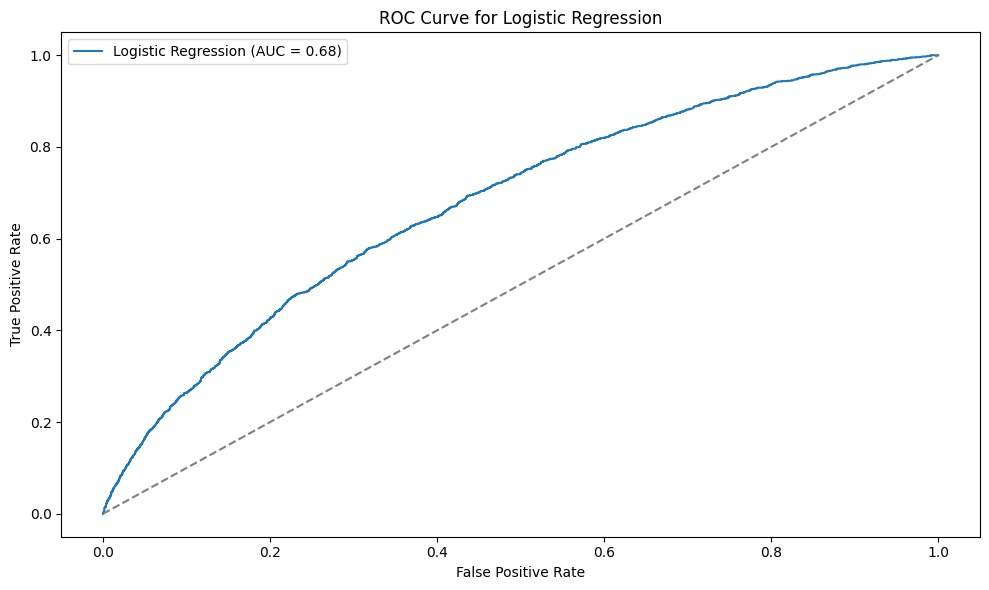

In [19]:
#Plot ROC curve
#AUC (Area Under Curve): Measures discrimination ability.
  # AUC > 0.7 is acceptable; > 0.8 is good.
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
auc = roc_auc_score(y_test, y_prob_lr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
#Interpret Coefficients as Odds Ratios
odds_ratios = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': np.exp(lr_model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios)

                                         Feature  Odds Ratio
1                                      Age_35-49    1.638724
21                          Helath_insurance_yes    1.565015
12                            Occupation_working    1.437230
23                      Visit_HealthFacility_yes    1.299656
26                    Radio_at least once a week    1.293571
0                                      Age_25-34    1.257090
9                               Region_sout west    1.239410
20                  Permission_not a big problem    1.195224
6                           Marital_status_other    1.116061
22                           Contraception_users    1.110719
28                Newspaper_at least once a week    1.060127
29                          Newspaper_not at all    1.034442
18  Distance_to_healthfacility_not a big problem    1.025730
19                       Money_not a big problem    0.995706
25                         Television_not at all    0.985868
5                  Marit

In [21]:
# Fit logistic regression using statsmodels to get standard errors
X_const = sm.add_constant(X)
model = sm.Logit(y, X_const)
result = model.fit()
# Extract coefficients and standard errors
params = result.params
conf = result.conf_int()
conf['OR_lower'] = np.exp(conf[0])
conf['OR_upper'] = np.exp(conf[1])
odds_ratios = pd.DataFrame({
    'Feature': params.index,
    'Odds Ratio': np.exp(params),
    'CI Lower': conf['OR_lower'],
    'CI Upper': conf['OR_upper']
}).sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.530690
         Iterations 6
                                                                                   Feature  \
Helath_insurance_yes                                                  Helath_insurance_yes   
Age_35-49                                                                        Age_35-49   
Occupation_working                                                      Occupation_working   
Radio_at least once a week                                      Radio_at least once a week   
Visit_HealthFacility_yes                                          Visit_HealthFacility_yes   
Age_25-34                                                                        Age_25-34   
Region_sout west                                                          Region_sout west   
Permission_not a big problem                                  Permission_not a big problem   
Marital_status_other                                

Optimization terminated successfully.
         Current function value: 0.530690
         Iterations 6
                                                                                   Feature  \
Helath_insurance_yes                                                  Helath_insurance_yes   
Age_35-49                                                                        Age_35-49   
Occupation_working                                                      Occupation_working   
Radio_at least once a week                                      Radio_at least once a week   
Visit_HealthFacility_yes                                          Visit_HealthFacility_yes   
Age_25-34                                                                        Age_25-34   
Region_sout west                                                          Region_sout west   
Permission_not a big problem                                  Permission_not a big problem   
Marital_status_other                                

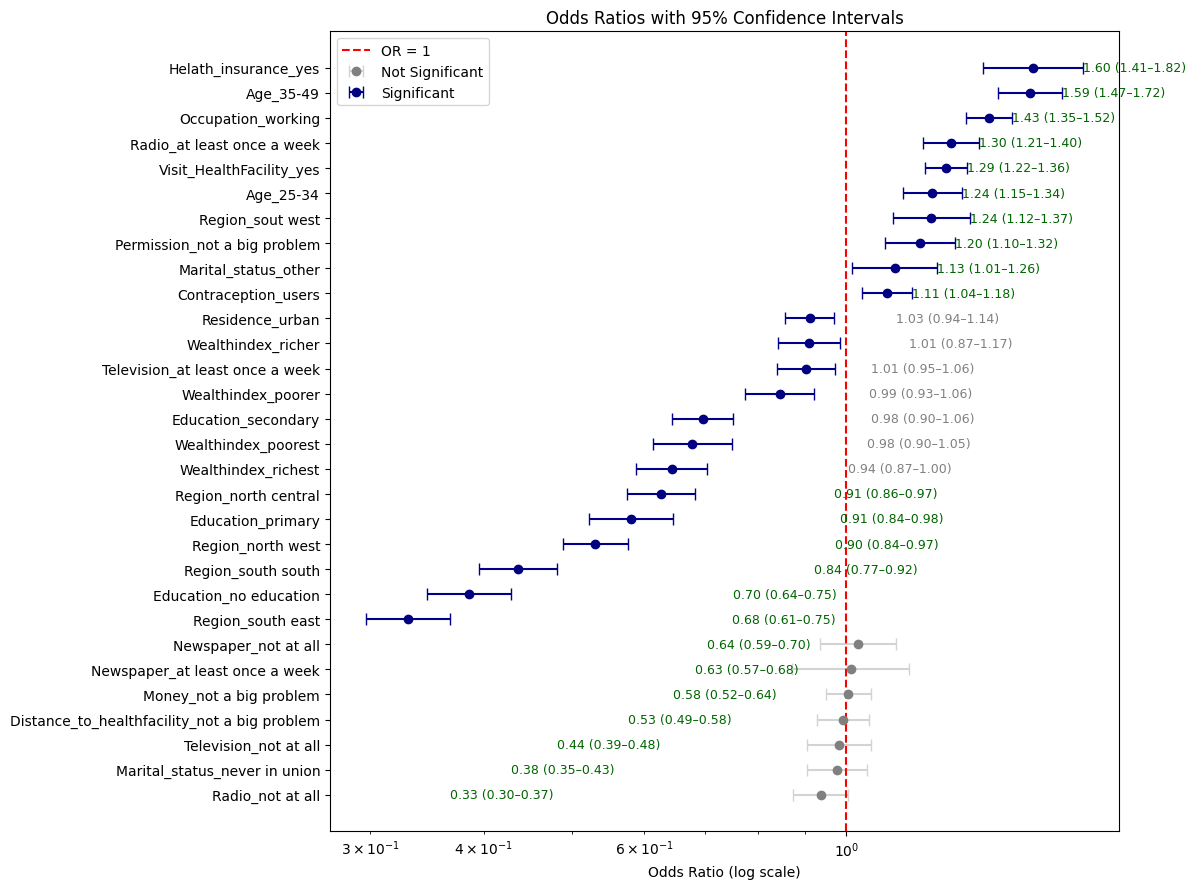

In [31]:
# Fit logistic regression using statsmodels to get standard errors
X_const = sm.add_constant(X)
model = sm.Logit(y, X_const)
result = model.fit()
# Extract coefficients and standard errors
params = result.params
conf = result.conf_int()
conf['OR_lower'] = np.exp(conf[0])
conf['OR_upper'] = np.exp(conf[1])
odds_ratios = pd.DataFrame({
    'Feature': params.index,
    'Odds Ratio': np.exp(params),
    'CI Lower': conf['OR_lower'],
    'CI Upper': conf['OR_upper']
}).sort_values(by='Odds Ratio', ascending=False)
print(odds_ratios)
import matplotlib.pyplot as plt

# 1. Remove 'const' row if present
odds_ratios_filtered = odds_ratios[odds_ratios['Feature'] != 'const']

# 2. Sort for cleaner display
odds_ratios_sorted = odds_ratios_filtered.sort_values(by='Odds Ratio', ascending=True).reset_index(drop=True)

# 3. Identify significant predictors (CI does not include 1)
odds_ratios_sorted['Significant'] = ~((odds_ratios_sorted['CI Lower'] <= 1) & (odds_ratios_sorted['CI Upper'] >= 1))

# 4. Create figure
plt.figure(figsize=(12, 9))

# 5. Separate significant and non-significant
sig = odds_ratios_sorted[odds_ratios_sorted['Significant']]
nonsig = odds_ratios_sorted[~odds_ratios_sorted['Significant']]

# 6. Plot non-significant predictors
plt.errorbar(
    nonsig['Odds Ratio'],
    nonsig['Feature'],
    xerr=[nonsig['Odds Ratio'] - nonsig['CI Lower'], nonsig['CI Upper'] - nonsig['Odds Ratio']],
    fmt='o',
    color='gray',
    ecolor='lightgray',
    capsize=4,
    label='Not Significant'
)

# 7. Plot significant predictors
plt.errorbar(
    sig['Odds Ratio'],
    sig['Feature'],
    xerr=[sig['Odds Ratio'] - sig['CI Lower'], sig['CI Upper'] - sig['Odds Ratio']],
    fmt='o',
    color='navy',
    ecolor='darkblue',
    capsize=4,
    label='Significant'
)

# 8. Annotate each point with OR (95% CI)
for i, row in odds_ratios_sorted.iterrows():
    or_val = row['Odds Ratio']
    ci_low = row['CI Lower']
    ci_up = row['CI Upper']
    label = f"{or_val:.2f} ({ci_low:.2f}–{ci_up:.2f})"
    text_color = 'darkgreen' if row['Significant'] else 'gray'
    plt.text(ci_up, i, label, va='center', ha='left', fontsize=9, color=text_color)

# 9. Final touches
plt.axvline(x=1, color='red', linestyle='--', label='OR = 1')
plt.xlabel('Odds Ratio (log scale)')
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()

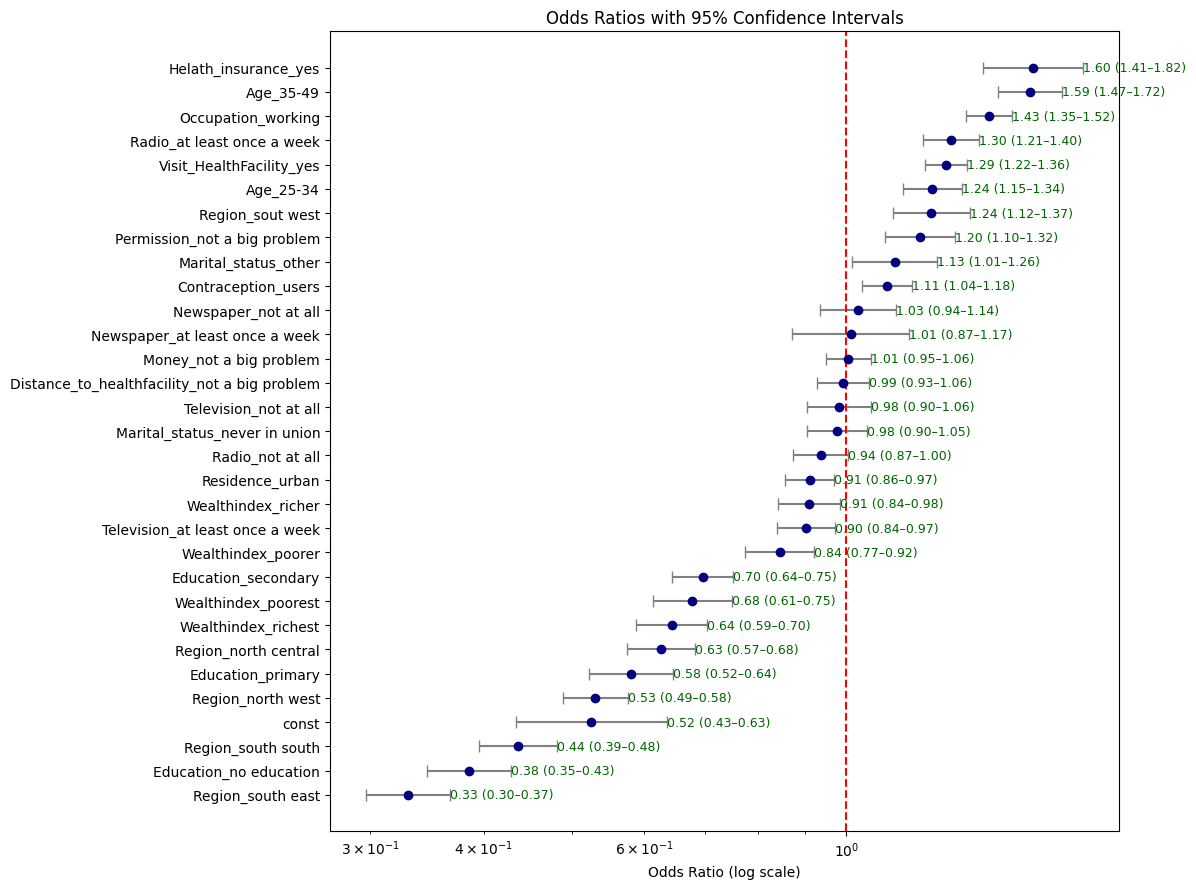

In [25]:
import matplotlib.pyplot as plt
# Sort for cleaner display
odds_ratios_sorted = odds_ratios.sort_values(by='Odds Ratio', ascending=True)
# Plot
plt.figure(figsize=(12, 9))
plt.errorbar(
    odds_ratios_sorted['Odds Ratio'],
    odds_ratios_sorted['Feature'],
    xerr=[odds_ratios_sorted['Odds Ratio'] - odds_ratios_sorted['CI Lower'],
          odds_ratios_sorted['CI Upper'] - odds_ratios_sorted['Odds Ratio']],
    fmt='o',
    color='navy',
    ecolor='gray',
    capsize=4
)
# Add OR (95% CI) labels
for i, row in odds_ratios_sorted.iterrows():
    or_val = row['Odds Ratio']
    ci_low = row['CI Lower']
    ci_up = row['CI Upper']
    label = f"{or_val:.2f} ({ci_low:.2f}–{ci_up:.2f})"
    plt.text(ci_up, i, label, va='center', ha='left', fontsize=9, color='darkgreen')

plt.axvline(x=1, color='red', linestyle='--')  # Reference line at OR=1
plt.xlabel('Odds Ratio (log scale)')
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.xscale('log')
plt.tight_layout()
plt.show()


In [25]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Make predictions
y_pred_dt = dt_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
sensitivity = recall_score(y_test, y_pred_dt)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_dt)
# Bootstrap to evaluate model performance
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_dt[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(precision_score(y_true_boot, y_pred_boot))
    recalls.append(recall_score(y_true_boot, y_pred_boot))
    f1s.append(f1_score(y_true_boot, y_pred_boot))
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_dt))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.682 95% CI: [0.671 0.693]
🔹 Precision (PPV): 0.36 95% CI: [0.335 0.383]
🔹 Sensitivity (Recall): 0.297 95% CI: [0.277 0.319]
🔹 Specificity: 0.816 95% CI: [0.805 0.827]
🔹 Negative Predictive Value (NPV): 0.769 95% CI: [0.758 0.781]
🔹 False Positive Rate (FPR): 0.184 95% CI: [0.173 0.195]
🔹 False Negative Rate (FNR): 0.703 95% CI: [0.681 0.723]
🔹 F1 Score: 0.326 95% CI: [0.304 0.346]
🔹 Confusion Matrix:
 [[4376  988]
 [1313  556]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      5364
           1       0.36      0.30      0.33      1869

    accuracy                           0.68      7233
   macro avg       0.56      0.56      0.56      7233
weighted avg       0.66      0.68      0.67      7233

🔹 True Positives (TP): 556
🔹 True Negatives (TN): 4376
🔹 False Positives (FP): 988
🔹 False Negatives (FN): 1313


In [33]:
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                                         Feature  Importance
13                               Residence_urban    0.066974
19                       Money_not a big problem    0.065182
22                           Contraception_users    0.057727
18  Distance_to_healthfacility_not a big problem    0.053467
16                            Wealthindex_richer    0.047216
0                                      Age_25-34    0.046028
27                              Radio_not at all    0.044501
25                         Television_not at all    0.044103
24               Television_at least once a week    0.041985
9                               Region_sout west    0.038912
20                  Permission_not a big problem    0.036588
4                            Education_secondary    0.036563
29                          Newspaper_not at all    0.035826
5                  Marital_status_never in union    0.034112
14                            Wealthindex_poorer    0.033203
26                    Ra

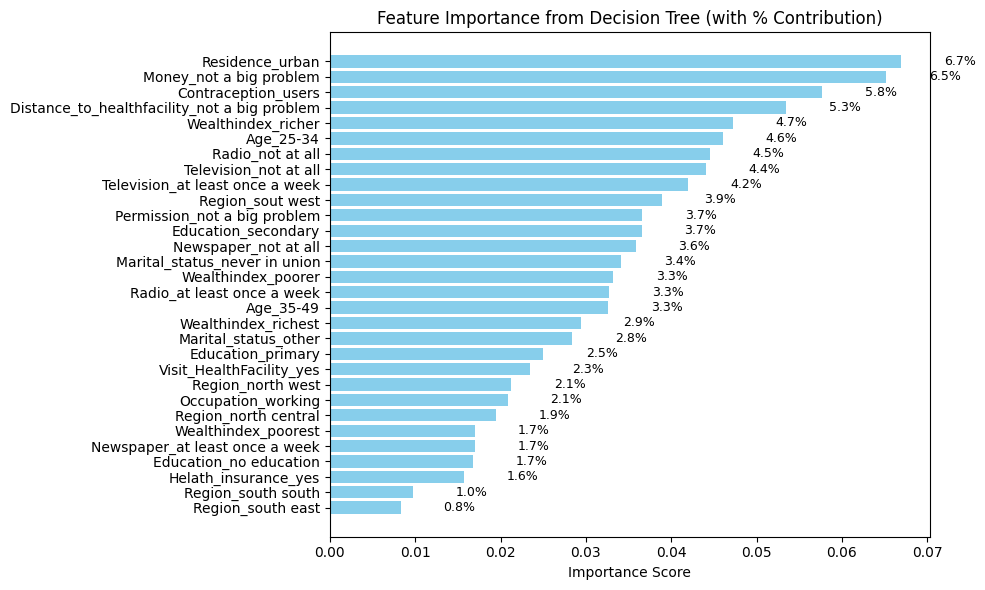

In [27]:
## Get and normalize feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')

# Add percentage labels at the end of each bar
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)

plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree (with % Contribution)')
plt.tight_layout()
plt.show()

In [29]:
#Random forest
#import and initialize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
sensitivity = recall_score(y_test, y_pred_rf)  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = f1_score(y_test, y_pred_rf)
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_rf[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(precision_score(y_true_boot, y_pred_boot))
    recalls.append(recall_score(y_true_boot, y_pred_boot))
    f1s.append(f1_score(y_true_boot, y_pred_boot))
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.71 95% CI: [0.7   0.721]
🔹 Precision (PPV): 0.399 95% CI: [0.373 0.427]
🔹 Sensitivity (Recall): 0.239 95% CI: [0.221 0.259]
🔹 Specificity: 0.875 95% CI: [0.866 0.883]
🔹 Negative Predictive Value (NPV): 0.767 95% CI: [0.757 0.779]
🔹 False Positive Rate (FPR): 0.125 95% CI: [0.117 0.134]
🔹 False Negative Rate (FNR): 0.761 95% CI: [0.741 0.779]
🔹 F1 Score: 0.299 95% CI: [0.278 0.32 ]
🔹 Confusion Matrix:
 [[4691  673]
 [1422  447]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      5364
           1       0.40      0.24      0.30      1869

    accuracy                           0.71      7233
   macro avg       0.58      0.56      0.56      7233
weighted avg       0.67      0.71      0.68      7233

🔹 True Positives (TP): 447
🔹 True Negatives (TN): 4691
🔹 False Positives (FP): 673
🔹 False Negatives (FN): 1422


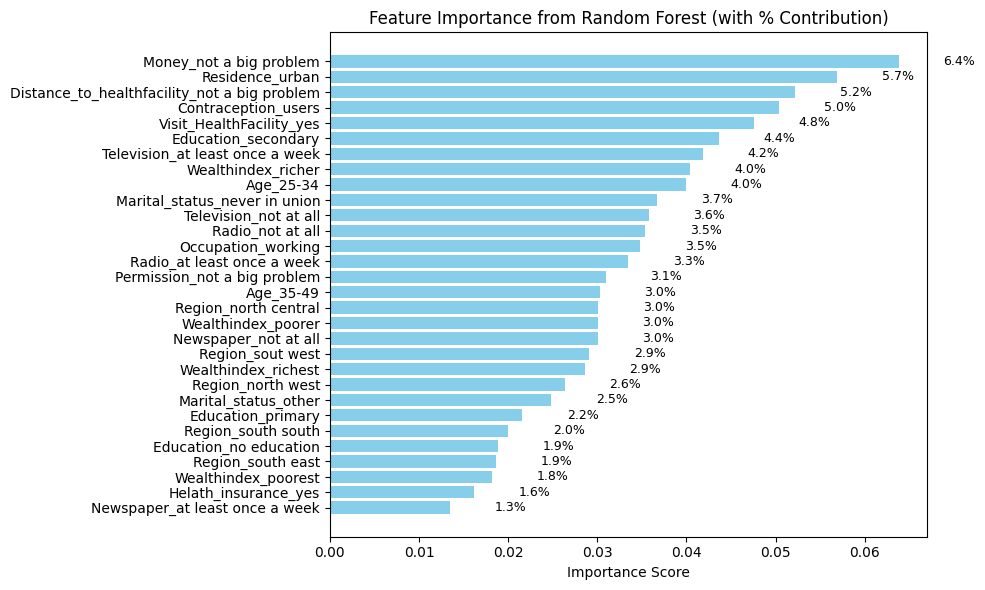

In [30]:
# Get and normalize feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance['Percentage'] = 100 * feature_importance['Importance'] / feature_importance['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
# Add percentage labels at the end of each bar
for bar, pct in zip(bars, feature_importance['Percentage']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
    plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest (with % Contribution)')
plt.tight_layout()
plt.show()

In [38]:
#3K-NeighborsClassifier
#Import and initialize
knn_model = KNeighborsClassifier(n_neighbors=6)
#Fit the model
knn_model.fit(X_train, y_train)
#Make predictions
y_pred_knn = knn_model.predict(X_test)
#Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_knn)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Output
print("🔹 Accuracy:", round(accuracy, 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)
print("🔹 Sensitivity (Recall):", round(sensitivity, 3))
print("🔹 Specificity:", round(specificity, 3))
print("🔹 Precision (PPV):", round(precision, 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3))
print("🔹 F1 Score:", round(f1, 3))
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_knn[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.738
🔹 Confusion Matrix:
 [[5049  315]
 [1579  290]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      5364
           1       0.48      0.16      0.23      1869

    accuracy                           0.74      7233
   macro avg       0.62      0.55      0.54      7233
weighted avg       0.69      0.74      0.69      7233

🔹 True Positives (TP): 290
🔹 True Negatives (TN): 5049
🔹 False Positives (FP): 315
🔹 False Negatives (FN): 1579
🔹 Sensitivity (Recall): 0.155
🔹 Specificity: 0.941
🔹 Precision (PPV): 0.479
🔹 Negative Predictive Value (NPV): 0.762
🔹 False Positive Rate (FPR): 0.059
🔹 False Negative Rate (FNR): 0.845
🔹 F1 Score: 0.234
🔹 Accuracy: 0.738 95% CI: [0.729 0.749]
🔹 Precision (PPV): 0.479 95% CI: [0.442 0.52 ]
🔹 Sensitivity (Recall): 0.155 95% CI: [0.139 0.172]
🔹 Specificity: 0.941 95% CI: [0.935 0.947]
🔹 Negative Predictive Value (NPV): 0.762 95% CI: [0.752 0.773]
🔹 False Positive Ra

In [41]:
#optional:Tune k for Best Performanc
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"k={k}, Accuracy={score:.3f}")


k=1, Accuracy=0.656
k=2, Accuracy=0.727
k=3, Accuracy=0.699
k=4, Accuracy=0.739
k=5, Accuracy=0.719
k=6, Accuracy=0.738
k=7, Accuracy=0.727
k=8, Accuracy=0.738
k=9, Accuracy=0.730
k=10, Accuracy=0.743
k=11, Accuracy=0.739
k=12, Accuracy=0.745
k=13, Accuracy=0.741
k=14, Accuracy=0.744
k=15, Accuracy=0.741
k=16, Accuracy=0.745
k=17, Accuracy=0.741
k=18, Accuracy=0.744
k=19, Accuracy=0.744
k=20, Accuracy=0.748


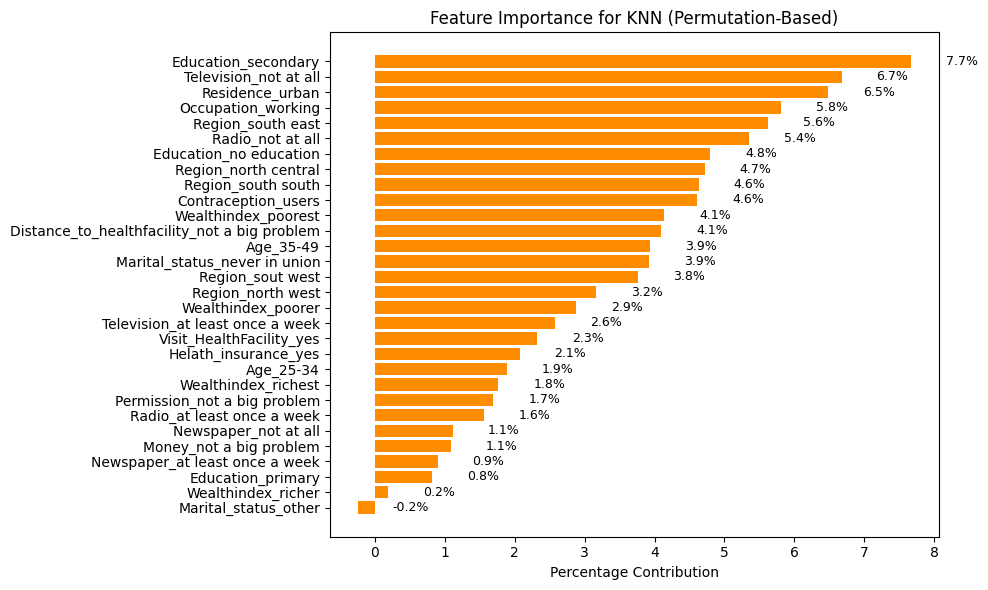

In [42]:
#premutation feature importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Fit KNN model
knn_model.fit(X_train, y_train)
# Compute permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='darkorange')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for KNN (Permutation-Based)')
plt.tight_layout()
plt.show()

In [31]:
#4 Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
# Make predictions
y_pred_gb = gb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_gb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_gb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_gb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.751 95% CI: [0.741 0.761]
🔹 Precision (PPV): 0.569 95% CI: [0.53  0.611]
🔹 Sensitivity (Recall): 0.148 95% CI: [0.132 0.164]
🔹 Specificity: 0.961 95% CI: [0.956 0.966]
🔹 Negative Predictive Value (NPV): 0.764 95% CI: [0.754 0.775]
🔹 False Positive Rate (FPR): 0.039 95% CI: [0.034 0.044]
🔹 False Negative Rate (FNR): 0.852 95% CI: [0.836 0.868]
🔹 F1 Score: 0.235 95% CI: [0.213 0.258]
🔹 Confusion Matrix:
 [[5154  210]
 [1592  277]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      5364
           1       0.57      0.15      0.24      1869

    accuracy                           0.75      7233
   macro avg       0.67      0.55      0.54      7233
weighted avg       0.71      0.75      0.69      7233

🔹 True Positives (TP): 277
🔹 True Negatives (TN): 5154
🔹 False Positives (FP): 210
🔹 False Negatives (FN): 1592


C:\Users\AUT\AppData\Local\Temp\ipykernel_948\3274041666.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


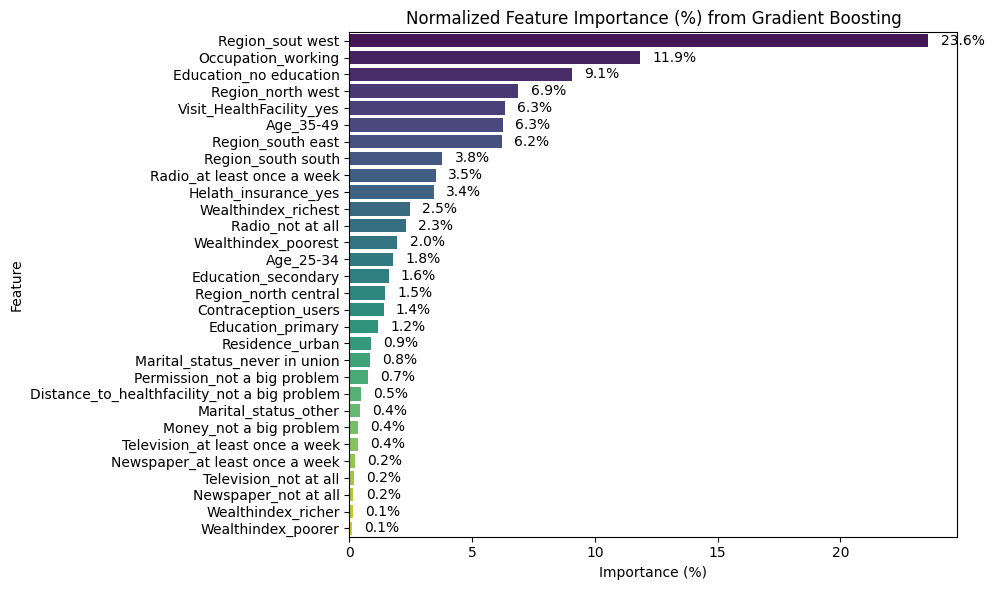

In [58]:
#Feature Importance for gardient boosting
# Normalize importance to percentages
importance_raw = gb_model.feature_importances_
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from Gradient Boosting')

# Add percentage labels on top of each bar
for i, (value) in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [32]:
#5XGBoost Classifier with Bootstrapped 95% Confidence Intervals
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_xgb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Accuracy: 0.744 95% CI: [0.733 0.754]
🔹 Precision (PPV): 0.51 95% CI: [0.473 0.546]
🔹 Sensitivity (Recall): 0.198 95% CI: [0.181 0.216]
🔹 Specificity: 0.934 95% CI: [0.927 0.94 ]
🔹 Negative Predictive Value (NPV): 0.77 95% CI: [0.759 0.78 ]
🔹 False Positive Rate (FPR): 0.066 95% CI: [0.06  0.073]
🔹 False Negative Rate (FNR): 0.802 95% CI: [0.784 0.819]
🔹 F1 Score: 0.285 95% CI: [0.263 0.307]
🔹 Confusion Matrix:
 [[5009  355]
 [1499  370]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      5364
           1       0.51      0.20      0.29      1869

    accuracy                           0.74      7233
   macro avg       0.64      0.57      0.56      7233
weighted avg       0.70      0.74      0.70      7233

🔹 True Positives (TP): 370
🔹 True Negatives (TN): 5009
🔹 False Positives (FP): 355
🔹 False Negatives (FN): 1499


C:\Users\AUT\AppData\Local\Temp\ipykernel_14936\662664979.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


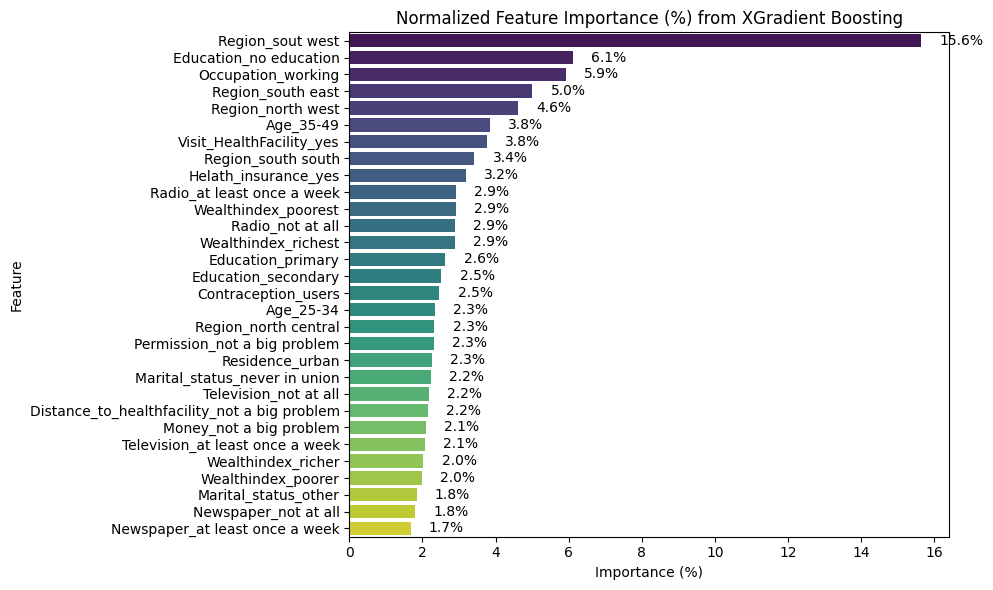

In [33]:
#Feature Importance for Xgardient boosting
# Normalize importance to percentages
importance_raw = xgb_model.feature_importances_
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from XGradient Boosting')

# Add percentage labels on top of each bar
for i, (value) in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [34]:
#6CatBoost Classifier with Bootstrapped 95% Confidence Interval
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
# Make predictions
y_pred_cat = cat_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_cat)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_cat)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []

for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_cat[indices]

    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()

    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)

# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_cat))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)


🔹 Accuracy: 0.748 95% CI: [0.738 0.758]
🔹 Precision (PPV): 0.535 95% CI: [0.497 0.573]
🔹 Sensitivity (Recall): 0.178 95% CI: [0.163 0.196]
🔹 Specificity: 0.946 95% CI: [0.94  0.952]
🔹 Negative Predictive Value (NPV): 0.768 95% CI: [0.757 0.779]
🔹 False Positive Rate (FPR): 0.054 95% CI: [0.048 0.06 ]
🔹 False Negative Rate (FNR): 0.822 95% CI: [0.804 0.837]
🔹 F1 Score: 0.267 95% CI: [0.246 0.291]
🔹 Confusion Matrix:
 [[5075  289]
 [1536  333]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85      5364
           1       0.54      0.18      0.27      1869

    accuracy                           0.75      7233
   macro avg       0.65      0.56      0.56      7233
weighted avg       0.71      0.75      0.70      7233

🔹 True Positives (TP): 333
🔹 True Negatives (TN): 5075
🔹 False Positives (FP): 289
🔹 False Negatives (FN): 1536


C:\Users\AUT\AppData\Local\Temp\ipykernel_14936\975257706.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')


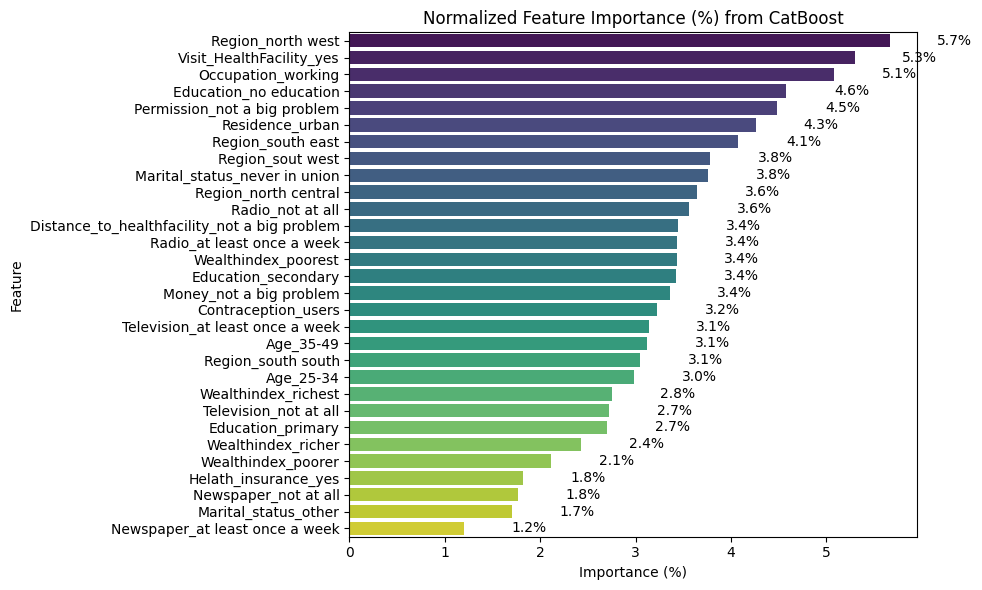

In [35]:
#Feature Importance for Catboosting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Extract raw feature importance from CatBoost
importance_raw = cat_model.feature_importances_
# Normalize to percentage
importance_percent = 100 * (importance_raw / importance_raw.sum())
# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importance_percent
}).sort_values(by='Importance (%)', ascending=False)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Normalized Feature Importance (%) from CatBoost')
# Add percentage labels on top of each bar
for i, value in enumerate(feature_importance['Importance (%)']):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center')
plt.tight_layout()
plt.show()

In [36]:
#7for support vector machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions
y_pred_svm = svm_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_svm)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_svm[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)


🔹 Accuracy: 0.749 95% CI: [0.739 0.76 ]
🔹 Precision (PPV): 0.575 95% CI: [0.524 0.624]
🔹 Sensitivity (Recall): 0.115 95% CI: [0.1  0.13]
🔹 Specificity: 0.97 95% CI: [0.966 0.975]
🔹 Negative Predictive Value (NPV): 0.759 95% CI: [0.749 0.77 ]
🔹 False Positive Rate (FPR): 0.03 95% CI: [0.025 0.034]
🔹 False Negative Rate (FNR): 0.885 95% CI: [0.87 0.9 ]
🔹 F1 Score: 0.192 95% CI: [0.168 0.214]
🔹 Confusion Matrix:
 [[5205  159]
 [1654  215]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85      5364
           1       0.57      0.12      0.19      1869

    accuracy                           0.75      7233
   macro avg       0.67      0.54      0.52      7233
weighted avg       0.71      0.75      0.68      7233

🔹 True Positives (TP): 215
🔹 True Negatives (TN): 5205
🔹 False Positives (FP): 159
🔹 False Negatives (FN): 1654


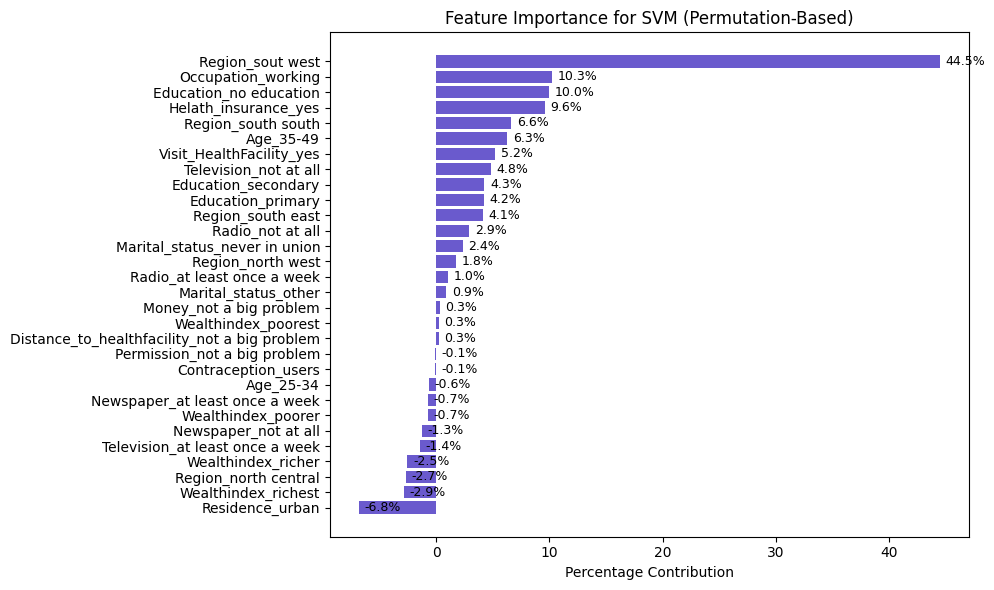

In [46]:
#Feature Importance for SVM (via Permutation Importance)
#SVM does not provide native feature importance, but you can estimate it using permutation importance:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='slateblue')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for SVM (Permutation-Based)')
plt.tight_layout()
plt.show()


In [41]:
#8for Gausian Naive Bayes(GNB)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
# Make predictions
y_pred_gnb = gnb_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_gnb)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_gnb)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_gnb[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

🔹 Accuracy: 0.672 95% CI: [0.661 0.683]
🔹 Precision (PPV): 0.38 95% CI: [0.36 0.4 ]
🔹 Sensitivity (Recall): 0.426 95% CI: [0.404 0.451]
🔹 Specificity: 0.757 95% CI: [0.746 0.768]
🔹 Negative Predictive Value (NPV): 0.791 95% CI: [0.78  0.803]
🔹 False Positive Rate (FPR): 0.243 95% CI: [0.232 0.254]
🔹 False Negative Rate (FNR): 0.574 95% CI: [0.549 0.596]
🔹 F1 Score: 0.402 95% CI: [0.383 0.421]
🔹 Confusion Matrix:
 [[4063 1301]
 [1072  797]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      5364
           1       0.38      0.43      0.40      1869

    accuracy                           0.67      7233
   macro avg       0.59      0.59      0.59      7233
weighted avg       0.68      0.67      0.68      7233

🔹 True Positives (TP): 797
🔹 True Negatives (TN): 4063
🔹 False Positives (FP): 1301
🔹 False Negatives (FN): 1072


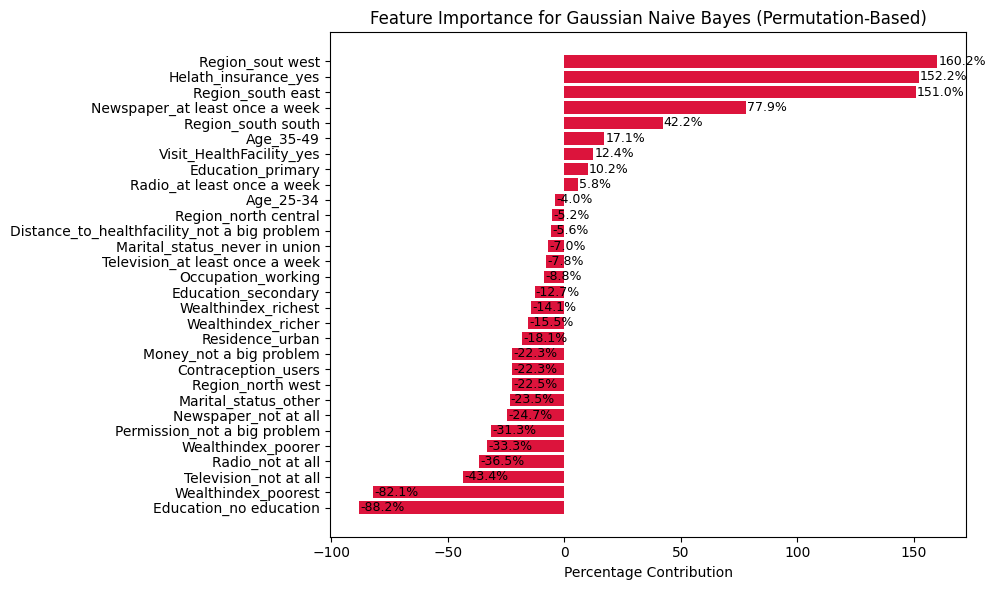

In [49]:
#Feature Importance via Permutation
#Naive Bayes doesn’t compute feature importance directly, but you can estimate it using permutation importance:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance
result = permutation_importance(gnb_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='crimson')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for Gaussian Naive Bayes (Permutation-Based)')
plt.tight_layout()
plt.show()

In [43]:
#9Arteficial Neural Network (ANN)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
# Import and initialize
ann_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)
# Make predictions
y_pred_ann = ann_model.predict(X_test)
# Confusion matrix and basic metrics
cm = confusion_matrix(y_test, y_pred_ann)
tn, fp, fn, tp = cm.ravel()
# Core metrics
accuracy = accuracy_score(y_test, y_pred_ann)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0  # PPV
npv = tn / (tn + fn) if (tn + fn) != 0 else 0
fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
# Bootstrap
n_bootstraps = 1000
rng = np.random.RandomState(42)
accs, precs, recalls, f1s = [], [], [], []
sensitivities, specificities, npvs, fprs, fnrs = [], [], [], [], []
for i in range(n_bootstraps):
    indices = rng.choice(len(y_test), len(y_test), replace=True)
    y_true_boot = y_test.iloc[indices]
    y_pred_boot = y_pred_ann[indices]
    cm_boot = confusion_matrix(y_true_boot, y_pred_boot)
    tn_b, fp_b, fn_b, tp_b = cm_boot.ravel()
    accs.append(accuracy_score(y_true_boot, y_pred_boot))
    precs.append(tp_b / (tp_b + fp_b) if (tp_b + fp_b) != 0 else 0)
    recalls.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    f1s.append(2 * precs[-1] * recalls[-1] / (precs[-1] + recalls[-1]) if (precs[-1] + recalls[-1]) != 0 else 0)
    sensitivities.append(tp_b / (tp_b + fn_b) if (tp_b + fn_b) != 0 else 0)
    specificities.append(tn_b / (tn_b + fp_b) if (tn_b + fp_b) != 0 else 0)
    npvs.append(tn_b / (tn_b + fn_b) if (tn_b + fn_b) != 0 else 0)
    fprs.append(fp_b / (fp_b + tn_b) if (fp_b + tn_b) != 0 else 0)
    fnrs.append(fn_b / (fn_b + tp_b) if (fn_b + tp_b) != 0 else 0)
# CI function
def ci(metric_list):
    return np.percentile(metric_list, [2.5, 97.5])
# Output
print("🔹 Accuracy:", round(accuracy, 3), "95% CI:", np.round(ci(accs), 3))
print("🔹 Precision (PPV):", round(precision, 3), "95% CI:", np.round(ci(precs), 3))
print("🔹 Sensitivity (Recall):", round(sensitivity, 3), "95% CI:", np.round(ci(recalls), 3))
print("🔹 Specificity:", round(specificity, 3), "95% CI:", np.round(ci(specificities), 3))
print("🔹 Negative Predictive Value (NPV):", round(npv, 3), "95% CI:", np.round(ci(npvs), 3))
print("🔹 False Positive Rate (FPR):", round(fpr, 3), "95% CI:", np.round(ci(fprs), 3))
print("🔹 False Negative Rate (FNR):", round(fnr, 3), "95% CI:", np.round(ci(fnrs), 3))
print("🔹 F1 Score:", round(f1, 3), "95% CI:", np.round(ci(f1s), 3))
print("🔹 Confusion Matrix:\n", cm)
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_ann))
print("🔹 True Positives (TP):", tp)
print("🔹 True Negatives (TN):", tn)
print("🔹 False Positives (FP):", fp)
print("🔹 False Negatives (FN):", fn)

c:\Users\AUT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


🔹 Accuracy: 0.732 95% CI: [0.722 0.742]
🔹 Precision (PPV): 0.461 95% CI: [0.43  0.492]
🔹 Sensitivity (Recall): 0.232 95% CI: [0.213 0.251]
🔹 Specificity: 0.906 95% CI: [0.898 0.913]
🔹 Negative Predictive Value (NPV): 0.772 95% CI: [0.762 0.783]
🔹 False Positive Rate (FPR): 0.094 95% CI: [0.087 0.102]
🔹 False Negative Rate (FNR): 0.768 95% CI: [0.749 0.787]
🔹 F1 Score: 0.308 95% CI: [0.287 0.331]
🔹 Confusion Matrix:
 [[4858  506]
 [1436  433]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83      5364
           1       0.46      0.23      0.31      1869

    accuracy                           0.73      7233
   macro avg       0.62      0.57      0.57      7233
weighted avg       0.69      0.73      0.70      7233

🔹 True Positives (TP): 433
🔹 True Negatives (TN): 4858
🔹 False Positives (FP): 506
🔹 False Negatives (FN): 1436


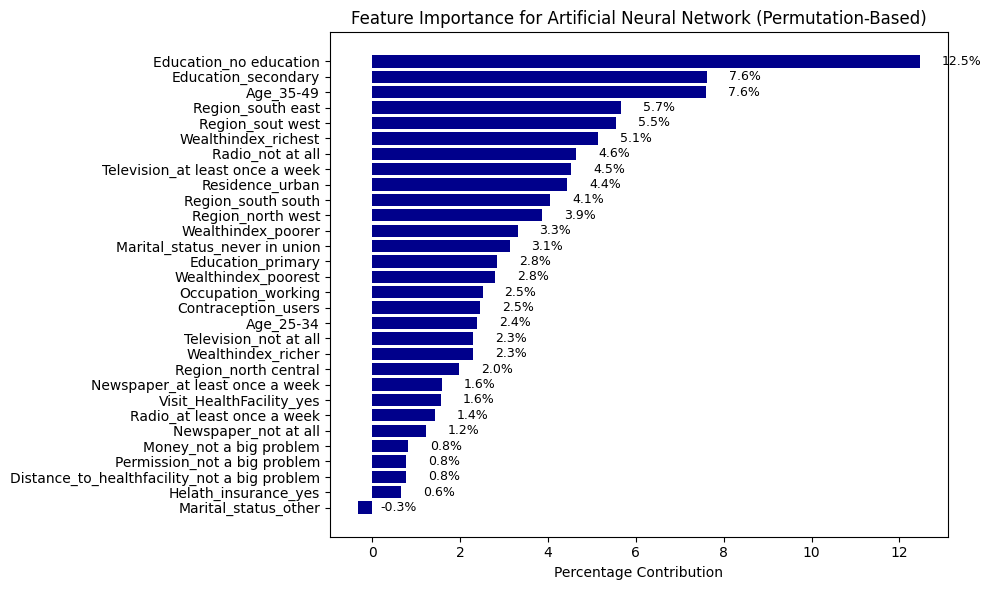

In [51]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
# Compute permutation importance for ANN
result = permutation_importance(ann_model, X_test, y_test, n_repeats=10, random_state=42)
# Format results
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)
# Normalize to percentage
importance_df['Percentage'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Percentage'], color='darkblue')
for bar, pct in zip(bars, importance_df['Percentage']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=9)
plt.xlabel('Percentage Contribution')
plt.title('Feature Importance for Artificial Neural Network (Permutation-Based)')
plt.tight_layout()
plt.show()

In [44]:
#to draw ROC curve all the models
# Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
# Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# KNN
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
# SVM (use decision_function if predict_proba not available)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
# Gaussian Naive Bayes
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]
# Gradient Boosting
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
## XGradientBoosting
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
## CatBoosting
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]
# Arteficial neural network
y_prob_ann = ann_model.predict_proba(X_test)[:, 1]

In [46]:
#Compute Roc curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)

auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_svm = roc_auc_score(y_test, y_prob_svm)
auc_gnb = roc_auc_score(y_test, y_prob_gnb)
auc_gb = roc_auc_score(y_test, y_prob_gb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
auc_cat = roc_auc_score(y_test, y_prob_cat)
auc_ann = roc_auc_score(y_test, y_prob_ann)

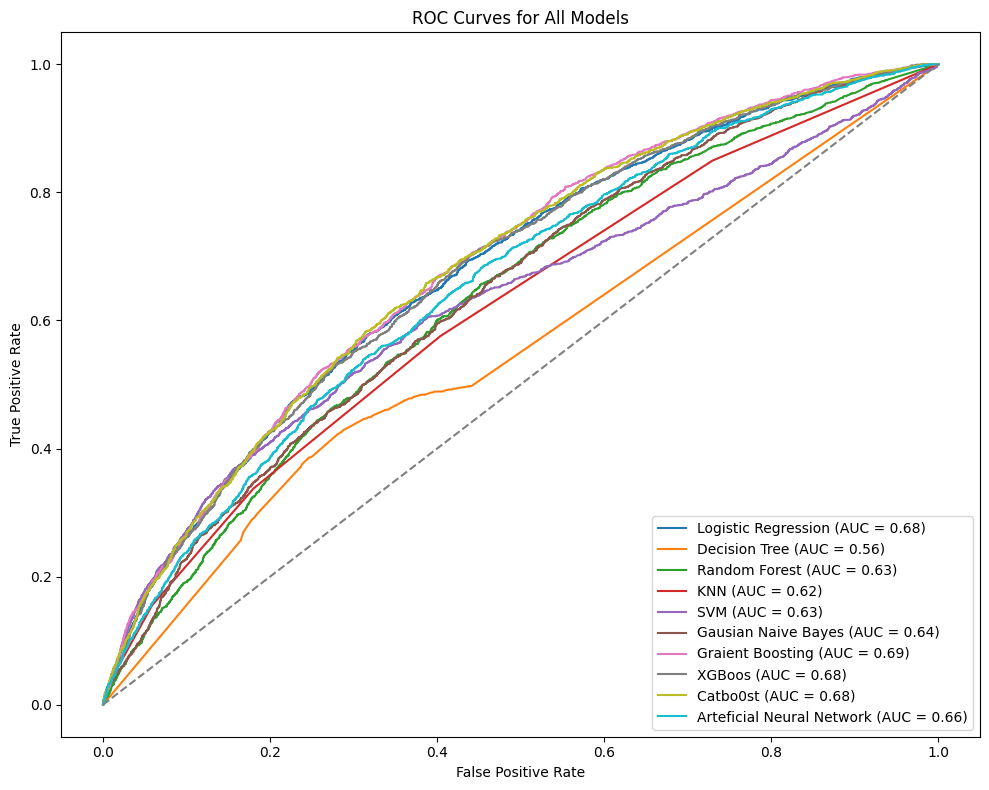

In [47]:
#Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_gnb, label=f'Gausian Naive Bayes (AUC = {auc_gnb:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Graient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoos (AUC = {auc_xgb:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'Catbo0st (AUC = {auc_cat:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'Arteficial Neural Network (AUC = {auc_ann:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [68]:
import shap
import matplotlib.pyplot as plt
# Initialize SHAP explainer (use TreeExplainer for tree-based models)
explainer = shap.TreeExplainer(xgb-model)  # Replace 'model' with your trained model (e.g., xgb_model, cat_model)
# Compute SHAP values
shap_values = explainer.shap_values(X_test)
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)
# Detailed summary plot (distribution of SHAP values per feature)
shap.summary_plot(shap_values, X_test, show=True)
# Optional: Force plot for individual prediction
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

NameError: name 'xgb' is not defined